**BBC News Text Classification**


In this we are going to develop a neural network which will going to perform the text classification using the BBC news da

Importing Libraries


1.   CSV - The csv module implements classes to read and write tabular data in CSV format.
2.   Tensorflow - It is used to create and training the ML models
1.   Numpy - Itsupports for large and multi-dimensional array along with high level mathematical function to operate on these array.
2.   Tokenizer - The tokenize module provides a lexical scanner for Python source code, implemented in Python
1.   Pad_sequences - Keras pad_sequences function is used to pad the sequences with the same length. The keras pad sequence function transforms several sequences into the numpy array.







In [17]:
!rm -rf ./.logs/
#Removing previous log files

In [18]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Loading the dataset**

*   Download the dataset from the internet. Since we are having the dataset in our local machine, we need to upload our dataset into the colab.
*   Below code is used to upload the dataset in the colab and able to perform necessary. There are many steps to load the dataset. You can upload the dataset into drive and use that link here etc.



In [19]:
from google.colab import files


uploaded = files.upload()


Saving bbc-text.csv to bbc-text (1).csv



**Preprocessing the data**
*   In this block we are preprocessing the data which we are going to use during the training of model.



In [20]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153




*   In this block we are importing the bbc-text.csv dataset. After that we are removing all the stop words provided in the stopwords list.



In [21]:
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

    
print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai



*   In this block we are going to split the preprocessed data into training and test set and validation set.



In [22]:
train_size = int(len(sentences) * training_portion) 
valid_size_ = train_size + ((len(sentences) - train_size)//2) 

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:valid_size_]
validation_labels = labels[train_size:valid_size_]

test_sentences = sentences[valid_size_:]
test_labels = labels[valid_size_:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))
print(len(test_sentences))
print(len(test_labels))

1780
1780
1780
222
222
223
223


Tokenizer


*   This class allows to vectorize a text corpus, by turning each text into either a sequence of integers or into a vector where the coefficient for each token could be binary, based on word count, based on tf-id.


    *   num_words - The maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.
    *   oov_token - If given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
    *   Fit_on_texts - Updates internal vocabulary based on a list of texts. In the case where texts contains lists, we assume each entry of the lists to be a token.
    *   Texts_to_sequences - Transforms each text in texts to a sequence of integers.   

    *   Pad_sequence - This function transforms a list of sequences into a 2D Numpy array of shape (num_samples, num_timesteps).Sequences that are shorter than num_timesteps are padded with value until they are num_timesteps long.












In [23]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [24]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

222
(222, 120)




*   This block is used to do the label tokenizer. 

*   Texts_to_sequences - Transforms each text in texts to a sequence of integers.





In [25]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(222, 1)




*   In this block we are building model with necessary layers. All the layers used are provided in detail.
*   Create a sequential model using sequential API. Sequential model is easy, minimal and aility to ability to represent all the neural network.

*   Embedding - This layer can only be used on positive integer inputs of a fixed range.
*   GlobalAveragePooling1D - Global Average Pooling is a pooling operation designed to replace fully connected layers in classical CNNs. The idea is to generate one feature map for each corresponding category of the classification task in the last conv layer.


*   Dense -The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models


*   Compile the model with the necessary optimizer along with the loss function and also with metric to be calculated. Below adam optimizer is used as optimizer.



In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________




*   Now initilize the training using the fit function with epochs and necessary records.
*   Epochs - An epoch consists of passing a dataset through the algorithm completely. Each Epoch consists of many weight update steps. To optimize the learning process, gradient descent is used, which is an iterative process. It improves the internal model parameters over many steps and not at once.



In [27]:
num_epochs = 50
history = model.fit(train_padded,training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7639 - accuracy: 0.1899 - val_loss: 1.7230 - val_accuracy: 0.2432 - 835ms/epoch - 15ms/step
Epoch 2/30
56/56 - 0s - loss: 1.6837 - accuracy: 0.4517 - val_loss: 1.6244 - val_accuracy: 0.6081 - 148ms/epoch - 3ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5812 - accuracy: 0.4185 - val_loss: 1.5223 - val_accuracy: 0.5090 - 137ms/epoch - 2ms/step
Epoch 4/30
56/56 - 0s - loss: 1.4633 - accuracy: 0.5511 - val_loss: 1.3991 - val_accuracy: 0.5721 - 144ms/epoch - 3ms/step
Epoch 5/30
56/56 - 0s - loss: 1.3141 - accuracy: 0.6270 - val_loss: 1.2470 - val_accuracy: 0.6126 - 148ms/epoch - 3ms/step
Epoch 6/30
56/56 - 0s - loss: 1.1428 - accuracy: 0.7298 - val_loss: 1.0942 - val_accuracy: 0.7523 - 136ms/epoch - 2ms/step
Epoch 7/30
56/56 - 0s - loss: 0.9688 - accuracy: 0.8270 - val_loss: 0.9372 - val_accuracy: 0.8243 - 128ms/epoch - 2ms/step
Epoch 8/30
56/56 - 0s - loss: 0.8083 - accuracy: 0.8843 - val_loss: 0.8005 - val_accuracy: 0.8784 - 121ms/epoch - 2ms/step
Epoch 9/30
56/5



*   Once the training is done we need to evaluate the trained model by comparing the accurarcy on the model over training and test data.



In [28]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))
#predicted = model.predict_classes(test_padded)
predictions = (model.predict(test_padded) > 0.5).astype("int32")
model.evaluate(x=test_padded, y=test_label_seq, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

7/7 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9327


[0.20193713903427124, 0.9327354431152344]



*   Once the training has done, we need to draw training graph to get to know about how the training set loss is reduced over the training time and also how accurarcy is imporving over training time.

*   We are using matplotlib to draw the graph.



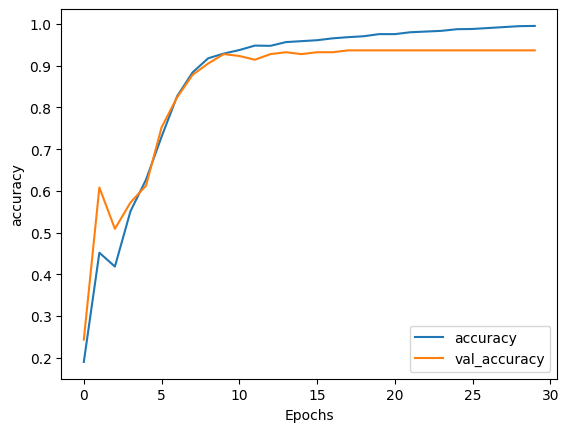

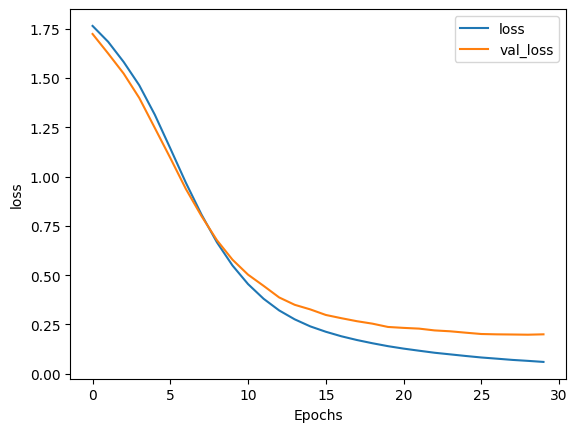

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(string,history):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs("accuracy",history)
plot_graphs("loss",history)



*   The below block is used to display the unique label features extracted from it.



In [37]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)
print(np.unique(training_label_seq))
print(np.unique(labels))

(1000, 16)
[1 2 3 4 5]
['business' 'entertainment' 'politics' 'sport' 'tech']




*   Word embedding space is plotted and displayed by using the matplotlib



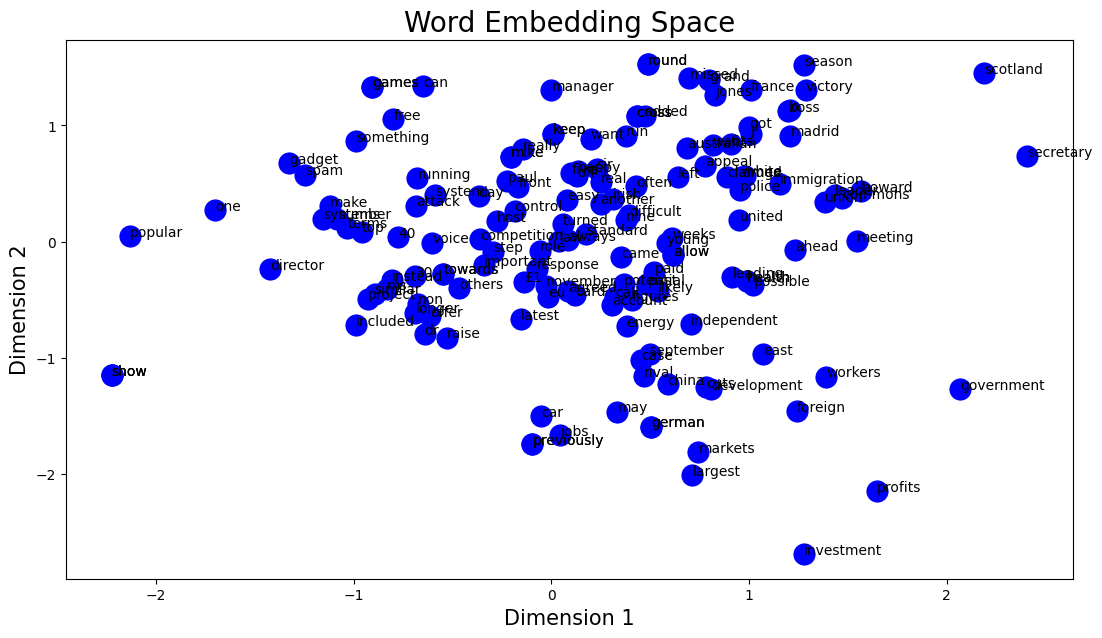

In [38]:
x=model.layers[0]
weight1=x.get_weights()[0]
df=pd.DataFrame(weight1)
X_corr=df.corr()
values,vectors=np.linalg.eig(X_corr)
eigv_s=(-values).argsort()
vectors=vectors[:,eigv_s]
new_vectors=vectors[:,:2]
new_X=np.dot(weight1,new_vectors)
vocab_word=list(word_index.keys())
vocab_word=vocab_word[:1000]
random_vocab=np.random.choice(vocab_word,150)
random_index=list(word_index[i] for i in random_vocab)
sampled_X=new_X[random_index,:]
plt.figure(figsize=(13,7))
plt.scatter(sampled_X[:,0],sampled_X[:,1],linewidths=10,color='blue')
plt.xlabel("Dimension 1",size=15)
plt.ylabel("Dimension 2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=len(random_vocab)
for i in range(vocab):
  word=random_vocab[i]
  plt.annotate(word,xy=(sampled_X[i,0],sampled_X[i,1]))